In [2]:
import imp
import pandas as pd
import os
import glob

importfiles = os.path.join("./Batch4","matches*.csv")

importfiles = glob.glob(importfiles)

data = pd.concat(map(pd.read_csv,importfiles),ignore_index= True)

print(data)

        Unnamed: 0  Match ID              Match Date          Player ID  Rank  \
0                0  80000100  23rd Sep 2022 01:46:16  76561198858351526  15.0   
1                1  80000100  23rd Sep 2022 01:46:16  76561199087579415   7.0   
2                2  80000100  23rd Sep 2022 01:46:16  76561199149801617  12.0   
3                3  80000100  23rd Sep 2022 01:46:16  76561199034942488   8.0   
4                4  80000100  23rd Sep 2022 01:46:16  76561198145381110   3.0   
...            ...       ...                     ...                ...   ...   
397325           5  80097001  24th Sep 2022 02:34:24  76561198150413065  12.0   
397326           6  80097001  24th Sep 2022 02:34:24  76561198001396020   NaN   
397327           7  80097001  24th Sep 2022 02:34:24  76561198881512538   7.0   
397328           8  80097001  24th Sep 2022 02:34:24  76561197961827967   NaN   
397329           9  80097001  24th Sep 2022 02:34:24  76561198195668255   2.0   

        Rank Gain Team  Tea

In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [4]:
import matplotlib
import datetime

from numpy import mat

def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [5]:

match = pd.DataFrame
matchdates = data.get(["Match ID","Match Date"])
# matchdates["Match Date"] = matplotlib.dates.datestr2num(matchdates["Match Date"])
matchdates.drop_duplicates(subset="Match ID",inplace= True)
matchdates["Match Date"] = pd.to_datetime(matchdates["Match Date"])
print(matchdates)

C:\Users\Mouette\AppData\Local\Temp\ipykernel_4588\35693158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdates.drop_duplicates(subset="Match ID",inplace= True)


        Match ID          Match Date
0       80000100 2022-09-23 01:46:16
9       80000099 2022-09-24 00:28:48
19      80000098 2022-09-24 01:32:24
29      80000097 2022-09-22 23:16:16
39      80000096 2022-09-23 03:28:48
...          ...                 ...
397280  80097005 2022-09-24 16:26:08
397290  80097004 2022-09-24 15:28:16
397300  80097003 2022-09-24 16:04:00
397310  80097002 2022-09-24 17:35:36
397320  80097001 2022-09-24 02:34:24

[39803 rows x 2 columns]


C:\Users\Mouette\AppData\Local\Temp\ipykernel_4588\35693158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdates["Match Date"] = pd.to_datetime(matchdates["Match Date"])


In [6]:
# matplotlib.pyplot.plot(matchdates["Match ID"],matchdates["Match Date"])

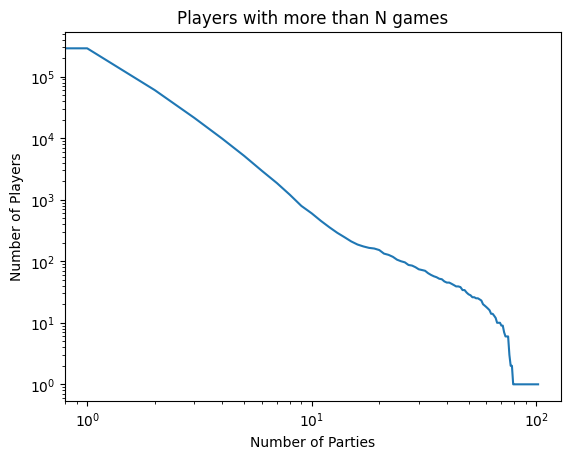

In [7]:
import matplotlib.pyplot as plt
players = data["Player ID"].value_counts()
nbPartiesPlayers = [None] * max(players.values)
for i in range(max(players.values)):
    nbPartiesPlayers[i] = players.drop(players[players.values<i].index).__len__()

plt.plot(nbPartiesPlayers)
plt.title("Players with more than N games")
plt.ylabel("Number of Players")
plt.xlabel("Number of Parties")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [8]:
csv = pd.DataFrame(players.drop(players[players.values<2].index).index).to_csv("PlayersToParse.csv")